# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           5.02e-23
Time:                        19:59:07   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

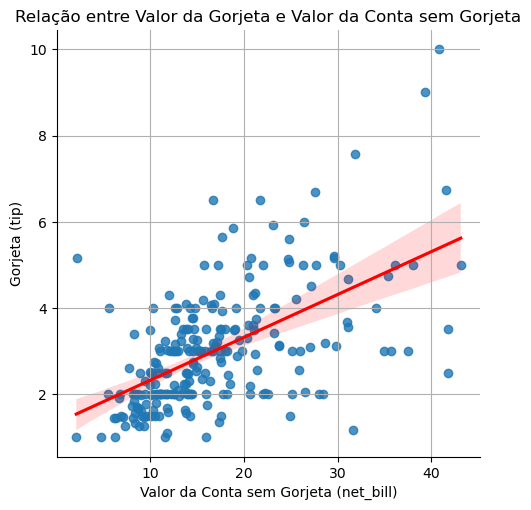

In [5]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

modelo = smf.ols('tip ~ net_bill', data=tips).fit()

print(modelo.summary())

sns.lmplot(x='net_bill', y='tip', data=tips, line_kws={'color': 'red'})
plt.title("Relação entre Valor da Gorjeta e Valor da Conta sem Gorjeta")
plt.xlabel("Valor da Conta sem Gorjeta (net_bill)")
plt.ylabel("Gorjeta (tip)")
plt.grid(True)
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           1.52e-06
Time:                        19:59:51   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

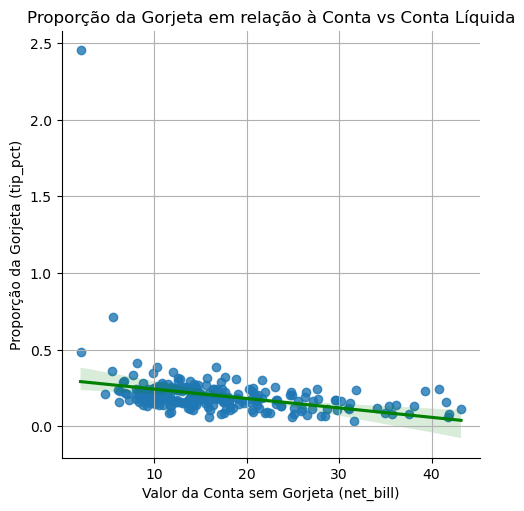

In [6]:
modelo_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

print(modelo_pct.summary())

sns.lmplot(x='net_bill', y='tip_pct', data=tips, line_kws={'color': 'green'})
plt.title("Proporção da Gorjeta em relação à Conta vs Conta Líquida")
plt.xlabel("Valor da Conta sem Gorjeta (net_bill)")
plt.ylabel("Proporção da Gorjeta (tip_pct)")
plt.grid(True)
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [ ]:
O modelo tip ~ net_bill mostra relação positiva forte: gorjetas aumentam com a conta. Já tip_pct ~ net_bill mostra leve queda na proporção da gorjeta conforme a conta cresce. Os R² não são comparáveis, pois os modelos têm variáveis dependentes diferentes.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [7]:
pred_tip_pct = modelo_pct.fittedvalues

tip_pred = pred_tip_pct * tips['net_bill']

from sklearn.metrics import r2_score

r2_transformado = r2_score(tips['tip'], tip_pred)
print(f"R² do modelo transformado: {r2_transformado:.4f}")

print(f"R² do modelo original: {modelo.rsquared:.4f}")


R² do modelo transformado: 0.1089
R² do modelo original: 0.3325
